The estimated Q1 differ between the new and old training datasets. This appears to be because [FSLI differs](#FSLI-is-different).

Does going back to v0.6 help?



In [1]:
%cd /home/disk/eos4/nbren12/work/uwnet

/home/disk/eos4/nbren12/work/uwnet


# FSLI is different

In [2]:
%matplotlib inline
import xarray as xr

old_data_path = "data/processed/training.nc"
new_path = "data/processed/training/noBlur.nc"

new = xr.open_dataset(new_path)
old = xr.open_dataset(old_data_path).isel(step=0)

t = 10 

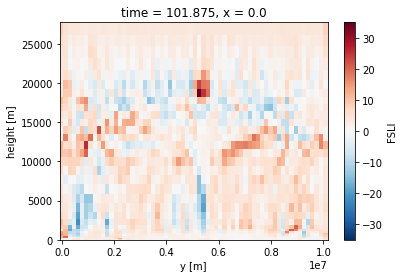

In [7]:
(new.FSLI[t,:,:,0]*86400).plot()

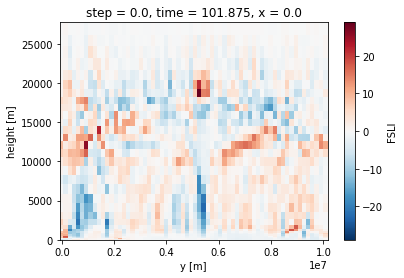

In [8]:
(old.FSLI[t,:,:,0]*86400).plot()

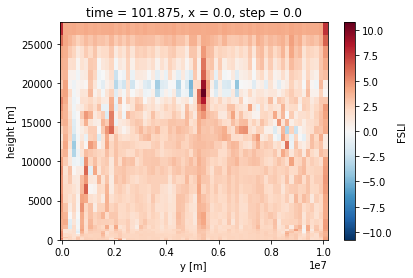

In [9]:
diff = new.FSLI[t,:,:,0]-old.FSLI[t,:,:,0]

(diff*86400).plot()

Why is the new FSLI  > old FSLI? Is there some difference in the namelists?

# Compare the namelists by SAM to pre-process the runs:

In [10]:
import json
from toolz import merge_with

old_nml = json.loads(old.sam_namelist)
new_nml = json.loads(new.sam_namelist)

In [11]:
new_nml['parameters']

{'caseid': 'control',
 'cem': True,
 'day0': 100.625,
 'docloud': False,
 'docolumn': False,
 'docoriolis': True,
 'doequinox': True,
 'dofplane': False,
 'dolargescale': False,
 'dolongwave': False,
 'donudging_tq': False,
 'donudging_uv': False,
 'doprecip': False,
 'doradforcing': False,
 'doradlat': True,
 'dosamconditionals': False,
 'dosatupdnconditionals': False,
 'doseasons': False,
 'dosfcforcing': False,
 'dosgs': False,
 'dodamping': True,
 'dosurface': True,
 'doshortwave': False,
 'doupperbound': False,
 'dowally': True,
 'dt': 120,
 'dx': 160000,
 'dy': 160000,
 'latitude0': 0.72,
 'longitude0': 0,
 'nprint': 240,
 'nrad': 30,
 'nrestart': 0,
 'nsave2d': 10,
 'nsave2dend': 99960480,
 'nsave2dstart': 0,
 'nsave3d': 10,
 'nsave3dend': 99960480,
 'nsave3dstart': 0,
 'nstat': 10,
 'nstatfrq': 1,
 'nstop': 10,
 'ocean': True,
 'ocean_type': 3,
 'save2dbin': True,
 'save3dbin': True,
 'dosgsthermo': False,
 'initial_condition_netcdf': 'CASE/ic.nc',
 'perturb_type': 23}

In [12]:
old_nml['parameters']

{'cem': True,
 'day0': 100.625,
 'docloud': False,
 'docolumn': False,
 'docoriolis': True,
 'doequinox': True,
 'dofplane': False,
 'dolargescale': False,
 'dolongwave': False,
 'donudging_tq': False,
 'donudging_uv': False,
 'doprecip': False,
 'doradforcing': False,
 'doradlat': True,
 'dosamconditionals': False,
 'dosatupdnconditionals': False,
 'doseasons': False,
 'dosfcforcing': False,
 'dosgs': True,
 'dodamping': True,
 'dosurface': True,
 'doshortwave': False,
 'doupperbound': False,
 'dowally': True,
 'dt': 30.0,
 'dx': 160000.0,
 'dy': 160000.0,
 'latitude0': 0.72,
 'longitude0': 0.0,
 'nprint': 240,
 'nrad': 30,
 'nrestart': 0,
 'nsave2d': 120,
 'nsave2dend': 99960480,
 'nsave2dstart': 0,
 'nsave3d': 10,
 'nsave3dend': 99960480,
 'nsave3dstart': 0,
 'nstat': 10,
 'nstatfrq': 1,
 'nstop': 10,
 'ocean': True,
 'ocean_type': 3,
 'save2dbin': True,
 'save3dbin': True,
 'dosgsthermo': False,
 'initial_condition_netcdf': 'CASE/ic.nc',
 'perturb_type': 23}

Does using the old namelist make a difference?

## Results

In [13]:
new_params = "params.json"
output = "out.nc"


with open(new_params, "w") as f:
    f.write(old.sam_namelist)
    
# !rm -rf {output}
!python uwnet/data/preprocess.py -n data/raw/2018-05-30-NG_5120x2560x34_4km_10s_QOBS_EQX -s $(pwd)/ext/sam -t {t} -p {new_params} {output}> /dev/null

python: can't open file 'uwnet/data/preprocess.py': [Errno 2] No such file or directory


In [10]:
new_step = xr.open_dataset(output)

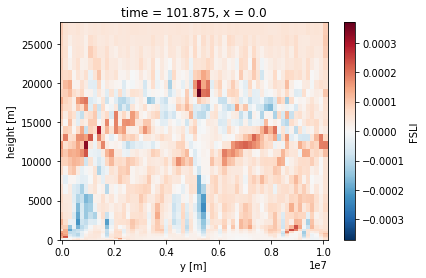

In [11]:
new_step.FSLI[0,:,:,0].plot()

# v0.6?

In [4]:
def insert_forcing(ds):
        # Compute forcings
    for key in ['QT', 'SLI', 'U', 'V']:
        forcing_key = 'F' + key
        src = ds[key].diff('step') / ds.step.diff('step') / 86400
        src = src.isel(step=0).drop('step')
        ds[forcing_key] = src


In [10]:
!git co v0.6
!make compile_sam
!snakemake --configfile setup/olympus/config.yaml  data/tmp/10.nc -f

td_v06 = xr.open_dataset("data/tmp/10.nc")
insert_forcing(td_v06)

M	ext/sam/SRC/write_fields3D.f90
HEAD is now at 79db62b... Plot results for manuscript in preparation
setup/olympus/compile_sam.sh
if ! ( -d /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_2D ) mkdir /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_2D
if ! ( -d /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_3D ) mkdir /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_3D
if ! ( -d /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_MOMENTS ) mkdir /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_MOMENTS
if ! ( -d /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_STAT ) mkdir /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_STAT
if ! ( -d /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_MOVIES ) mkdir /home/disk/eos4/nbren12/work/uwnet/ext/sam/OUT_MOVIES
if ! ( -d /home/disk/eos4/nbren12/work/uwnet/ext/sam/RESTART ) mkdir /home/disk/eos4/nbren12/work/uwnet/ext/sam/RESTART
if ! ( -d /home/disk/eos4/nbren12/work/uwnet/ext/sam/OBJ ) mkdir /home/disk/eos4/nbren12/work/uwnet/ext/sam/OBJ
if ! ( -d OUT_2D ) ln -s 

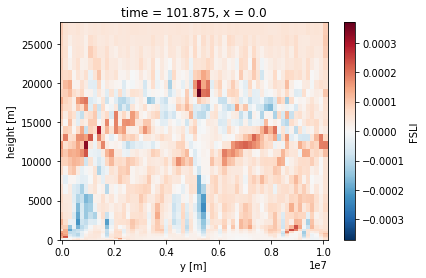

In [23]:
td_v06.FSLI[0,:,:,0].plot()

# v0.6 doesn't work...trying 8ab0f36

In [5]:
td_8ab0f36 = xr.open_dataset("data/tmp/10.nc")
insert_forcing(td_8ab0f36)

In [6]:
td_8ab0f36

<xarray.Dataset>
Dimensions:  (step: 2, time: 1, x: 128, y: 64, z: 34)
Coordinates:
  * step     (step) float64 0.0 0.003471
  * time     (time) float64 101.9
  * x        (x) float32 0.0 160000.0 320000.0 ... 20160000.0 20320000.0
  * y        (y) float32 0.0 160000.0 320000.0 ... 9920000.0 10080000.0
  * z        (z) float32 37.0 112.0 194.0 288.0 ... 24000.0 25500.0 27000.0
Data variables:
    PP       (time, step, z, y, x) float32 ...
    QT       (time, step, z, y, x) float32 ...
    QV       (time, step, z, y, x) float32 ...
    SLI      (time, step, z, y, x) float32 ...
    TABS     (time, step, z, y, x) float32 ...
    U        (time, step, z, y, x) float32 ...
    V        (time, step, z, y, x) float32 ...
    W        (time, step, z, y, x) float32 ...
    p        (time, step, z) float32 ...
    FQT      (time, z, y, x) float64 -1.022e-05 -1.46e-05 ... 3.222e-37
    FSLI     (time, z, y, x) float64 -6.624e-05 -4.467e-05 ... -1.628e-06
    FU       (time, z, y, x) float64 0.00

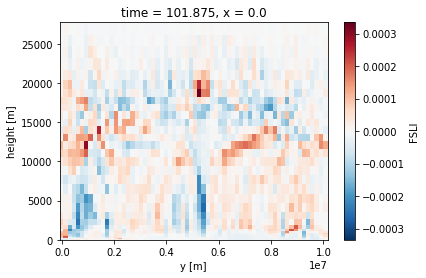

In [7]:
td_8ab0f36.FSLI[0,:,:,0].plot()

results of git bisect

    # first bad commit: [351059feba47f36f9f3715150e41775ba7cc6e1b] Implement Nudging (#56)